Bringing together GDP and Personal Income by US County

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List

MYDIR = "./../../ResearchProposal/"

# print(os.path)
myFiles = os.listdir(MYDIR)
# print(myFiles)

gdpFile = MYDIR + "bea_gov/gdp/gdp_ready_to_analyze.csv"
piFile = MYDIR + "bea_gov/personal_income/personal_income_ready_to_analyze.csv"
hhiFile = MYDIR + "income_inequality/census_income_by_county/hh_income__census_data.csv"

In [2]:
gdpData = pd.read_csv(gdpFile)
gdpData.head()

,aggregation_level,real_gdp_2012usd_2015,real_gdp_2012usd_2016,real_gdp_2012usd_2017,real_gdp_2012usd_2018,state,real_gdp_2012usd_2015_log,real_gdp_2012usd_2016_log,real_gdp_2012usd_2017_log,real_gdp_2012usd_2018_log
0,United States,1.740384e+10,1.768889e+10,1.810808e+10,1.863816e+10,United States,10.240645,10.247701,10.257872,10.270403
1,Alabama,1.893391e+08,1.907030e+08,1.930239e+08,1.984359e+08,Alabama,8.277240,8.280358,8.285611,8.297620
2,Autauga,1.518409e+06,1.526310e+06,1.422078e+06,1.483414e+06,Alabama,6.181389,6.183643,6.152923,6.171262
3,Baldwin,5.345363e+06,5.496105e+06,5.525882e+06,5.774289e+06,Alabama,6.727977,6.740055,6.742402,6.761499
4,Barbour,7.565900e+05,7.428100e+05,7.456250e+05,7.874250e+05,Alabama,5.878861,5.870878,5.872520,5.896209


In [3]:
piData = pd.read_csv(piFile)
piData.head()

,aggregation_level,income_usd_2016,income_usd_2017,income_usd_2018,state,income_usd_2016_log,income_usd_2017_log,income_usd_2018_log
0,United States,49870.0,51885.0,54446.0,United States,4.697839,4.715042,4.735966
1,Alabama,39224.0,40467.0,42238.0,Alabama,4.593552,4.607101,4.625703
2,Autauga,39561.0,40450.0,41618.0,Alabama,4.597267,4.606919,4.619281
3,Baldwin,42907.0,43989.0,45596.0,Alabama,4.632528,4.643344,4.658927
4,Barbour,31595.0,33048.0,35199.0,Alabama,4.499618,4.519145,4.546530


In [4]:
gdpiData = gdpData.merge(piData, on=["aggregation_level", "state"])
print(f"""Joined GDP and Personal Income data.  Result has {len(gdpiData)} rows.""")
gdpiData.head()

Joined GDP and Personal Income data.  Result has 3180 rows.


,aggregation_level,real_gdp_2012usd_2015,real_gdp_2012usd_2016,real_gdp_2012usd_2017,real_gdp_2012usd_2018,state,real_gdp_2012usd_2015_log,real_gdp_2012usd_2016_log,real_gdp_2012usd_2017_log,real_gdp_2012usd_2018_log,income_usd_2016,income_usd_2017,income_usd_2018,income_usd_2016_log,income_usd_2017_log,income_usd_2018_log
0,United States,1.740384e+10,1.768889e+10,1.810808e+10,1.863816e+10,United States,10.240645,10.247701,10.257872,10.270403,49870.0,51885.0,54446.0,4.697839,4.715042,4.735966
1,Alabama,1.893391e+08,1.907030e+08,1.930239e+08,1.984359e+08,Alabama,8.277240,8.280358,8.285611,8.297620,39224.0,40467.0,42238.0,4.593552,4.607101,4.625703
2,Autauga,1.518409e+06,1.526310e+06,1.422078e+06,1.483414e+06,Alabama,6.181389,6.183643,6.152923,6.171262,39561.0,40450.0,41618.0,4.597267,4.606919,4.619281
3,Baldwin,5.345363e+06,5.496105e+06,5.525882e+06,5.774289e+06,Alabama,6.727977,6.740055,6.742402,6.761499,42907.0,43989.0,45596.0,4.632528,4.643344,4.658927
4,Barbour,7.565900e+05,7.428100e+05,7.456250e+05,7.874250e+05,Alabama,5.878861,5.870878,5.872520,5.896209,31595.0,33048.0,35199.0,4.499618,4.519145,4.546530


In [5]:
hhiData = pd.read_csv(hhiFile)
cols = list(hhiData.columns)
for cc in range(len(cols)):
    cols[cc] = cols[cc].replace("_", " ")
    cols[cc] = cols[cc].strip()
    cols[cc] = cols[cc].replace(" ", "_")
    cols[cc] = cols[cc].replace(",", "")
hhiData.columns = cols
hhiData.head()

,Total,Less_than_USD10000,USD10000_to_USD14999,USD15000_to_USD24999,USD25000_to_USD34999,USD35000_to_USD49999,USD50000_to_USD74999,USD75000_to_USD99999,USD100000_to_USD149999,USD150000_to_USD199999,...,Median_income__dollars,Mean_income__dollars,PERCENT_IMPUTED__Household_income_in_the_past_12_months,PERCENT_IMPUTED__Family_income_in_the_past_12_months,id,county,state,county_state,mean_to_median_household_income_ratio,year
0,8626.0,5.0,4.3,11.1,10.6,15.1,22.6,15.7,11.6,2.6,...,53470.0,62728.0,28.4,NaN,0500000US17083,Jersey,Illinois,"Jersey, Illinois",1.173144,2010
1,10001.0,5.6,5.2,10.3,13.2,15.4,21.6,14.4,9.3,3.2,...,50279.0,61591.0,24.9,NaN,0500000US17085,Jo Daviess,Illinois,"Jo Daviess, Illinois",1.224985,2010
2,4396.0,10.6,5.5,14.5,12.9,16.5,20.5,11.1,6.6,1.3,...,41619.0,48435.0,32.3,NaN,0500000US17087,Johnson,Illinois,"Johnson, Illinois",1.163771,2010
3,168980.0,3.6,3.1,7.7,8.2,13.3,18.8,15.0,17.2,7.1,...,67767.0,86358.0,24.6,NaN,0500000US17089,Kane,Illinois,"Kane, Illinois",1.274337,2010
4,40943.0,6.4,6.5,11.2,11.2,14.4,20.1,14.4,11.1,3.0,...,50484.0,61006.0,29.9,NaN,0500000US17091,Kankakee,Illinois,"Kankakee, Illinois",1.208422,2010


In [6]:
disparity_data = hhiData[["year", "county", "state", 
                          "county_state", "mean_to_median_household_income_ratio"]].copy()
disparity_data.head()

gdpidData = gdpiData.merge(disparity_data, left_on=["aggregation_level", "state"], right_on=["county", "state"])
gdpidData.head()

,aggregation_level,real_gdp_2012usd_2015,real_gdp_2012usd_2016,real_gdp_2012usd_2017,real_gdp_2012usd_2018,state,real_gdp_2012usd_2015_log,real_gdp_2012usd_2016_log,real_gdp_2012usd_2017_log,real_gdp_2012usd_2018_log,income_usd_2016,income_usd_2017,income_usd_2018,income_usd_2016_log,income_usd_2017_log,income_usd_2018_log,year,county,county_state,mean_to_median_household_income_ratio
0,Autauga,1518409.0,1526310.0,1422078.0,1483414.0,Alabama,6.181389,6.183643,6.152923,6.171262,39561.0,40450.0,41618.0,4.597267,4.606919,4.619281,2010,Autauga,"Autauga, Alabama",1.215529
1,Autauga,1518409.0,1526310.0,1422078.0,1483414.0,Alabama,6.181389,6.183643,6.152923,6.171262,39561.0,40450.0,41618.0,4.597267,4.606919,4.619281,2011,Autauga,"Autauga, Alabama",1.232991
2,Autauga,1518409.0,1526310.0,1422078.0,1483414.0,Alabama,6.181389,6.183643,6.152923,6.171262,39561.0,40450.0,41618.0,4.597267,4.606919,4.619281,2012,Autauga,"Autauga, Alabama",1.240009
3,Autauga,1518409.0,1526310.0,1422078.0,1483414.0,Alabama,6.181389,6.183643,6.152923,6.171262,39561.0,40450.0,41618.0,4.597267,4.606919,4.619281,2013,Autauga,"Autauga, Alabama",1.205227
4,Autauga,1518409.0,1526310.0,1422078.0,1483414.0,Alabama,6.181389,6.183643,6.152923,6.171262,39561.0,40450.0,41618.0,4.597267,4.606919,4.619281,2014,Autauga,"Autauga, Alabama",1.227518


In [7]:
def plot2D(gdpidData: pd.DataFrame, year: int,
           xVar_base: str,
           yVar_base: str,
           ):
    
    yrData = gdpidData.loc[gdpidData["year"] == year].copy()
    xVar = xVar_base + str(year)
    yVar = yVar_base + str(year)
    if yVar_base == "mean_to_median_household_income_ratio":
        yVar = yVar_base
    #     ax = gdpidData.plot.scatter (x="real_gdp_2012usd_" + year, y="income_usd_" + year, figsize=(10, 8))
    ax = yrData.plot.scatter (x=xVar, 
                              y=yVar, figsize=(10, 8))
    
    ax.set_xscale("log")
    
    if yVar_base != "mean_to_median_household_income_ratio":
        ax.set_yscale("log")
        ax.set_title("Personal Income and " + xVar_base + " for " + str(year), fontsize=14)
        ax.set_ylabel("Mean to Median Income Ratio", fontsize=14)
    else:
        ax.set_title("Income Disparity and " + xVar_base + " for " + str(year), fontsize=14)
        ax.set_ylabel("Mean to Median Income Ratio", fontsize=14)

    ax.set_xlabel(xVar, fontsize=14)
    
    plt.show()

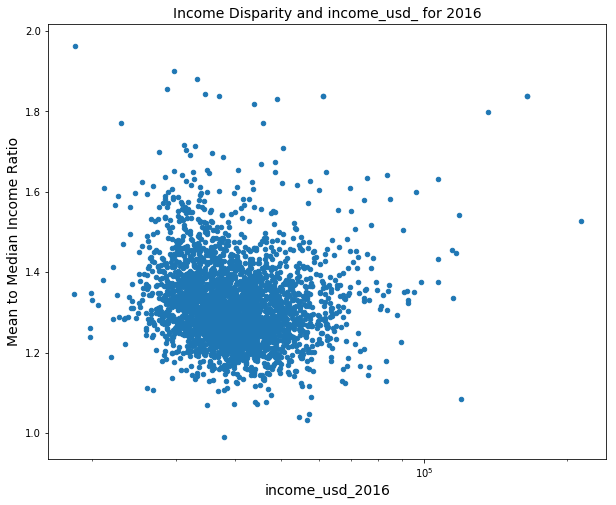

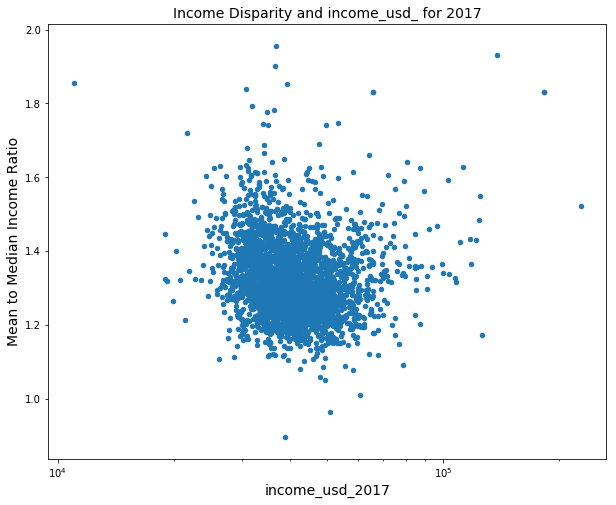

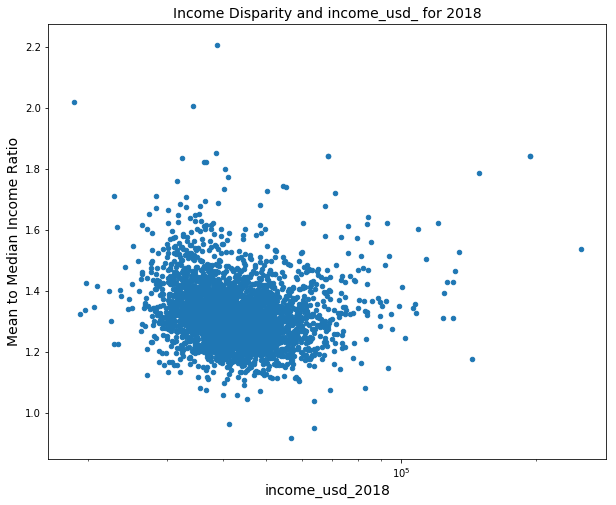

In [8]:
for year in (2016, 2017, 2018):
    plot2D(gdpidData, year, 
           "income_usd_",  
           "mean_to_median_household_income_ratio")

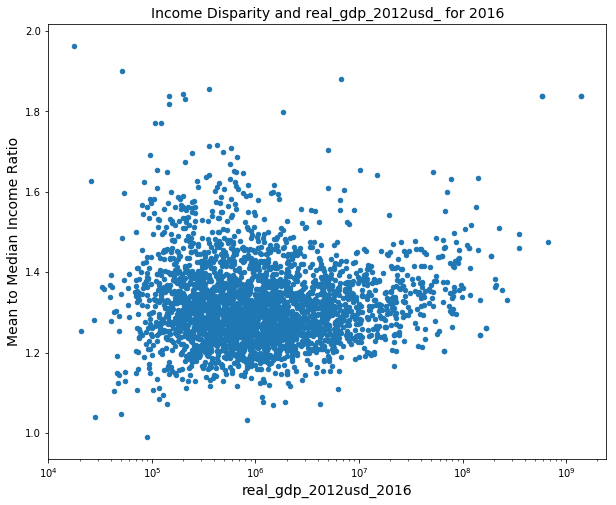

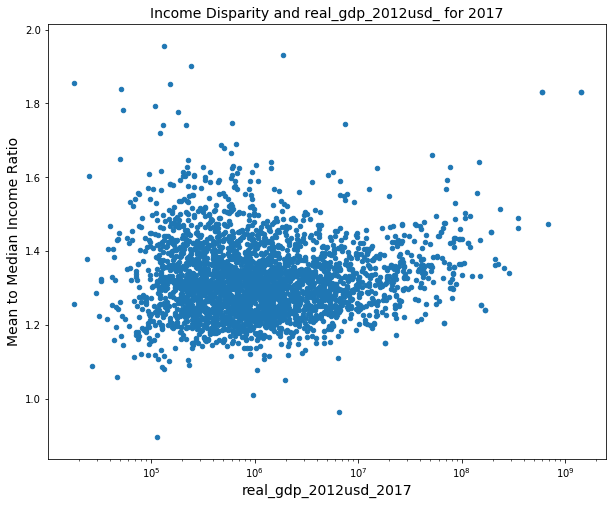

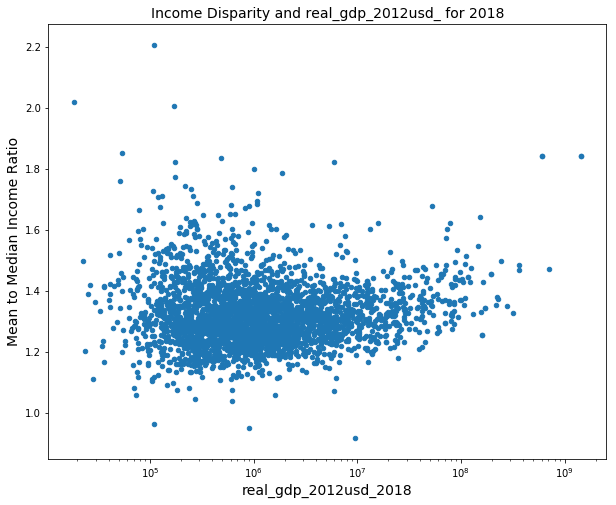

In [9]:
for year in (2016, 2017, 2018):
    plot2D(gdpidData, year, 
           "real_gdp_2012usd_",  
           "mean_to_median_household_income_ratio")

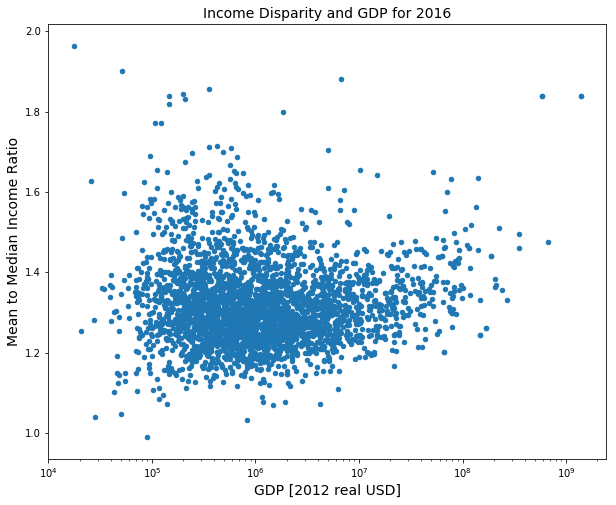

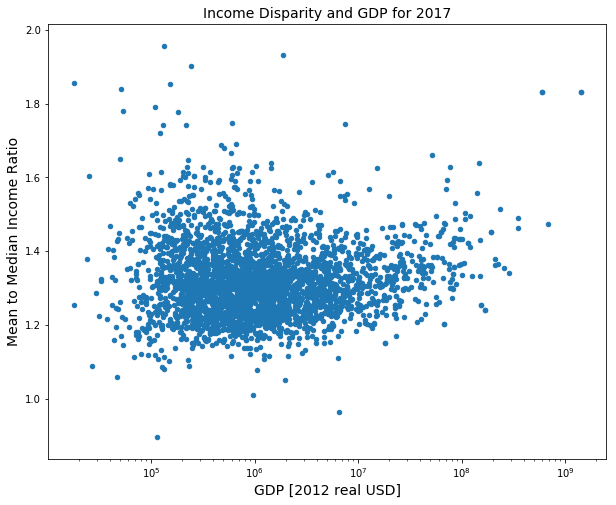

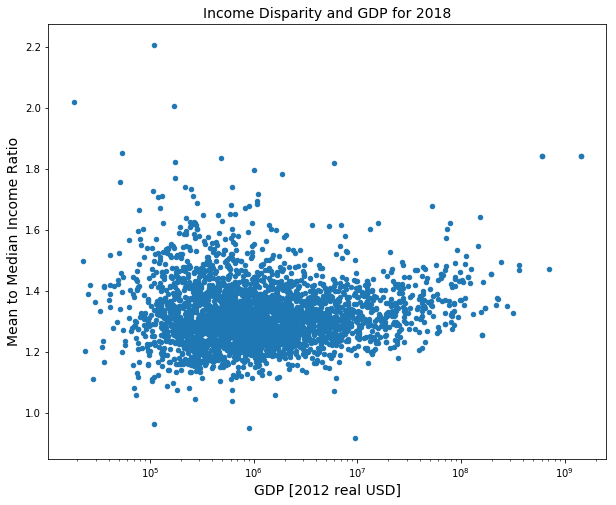

In [10]:
for year in ("2016", "2017", "2018"):

    yrData = gdpidData.loc[gdpidData["year"].astype("str") == year].copy()
    
#     ax = gdpidData.plot.scatter (x="real_gdp_2012usd_" + year, y="income_usd_" + year, figsize=(10, 8))
    ax = yrData.plot.scatter (x="real_gdp_2012usd_" + year, y="mean_to_median_household_income_ratio", figsize=(10, 8))
    ax.set_xscale("log")
    #     ax.set_yscale("log")
    ax.set_xlabel("GDP [2012 real USD]", fontsize=14)
    ax.set_ylabel("Mean to Median Income Ratio", fontsize=14)
    
    ax.set_title("Income Disparity and GDP for " + year, fontsize=14)
    plt.show()

In [11]:
def applyPCA(gdpiData: pd.DataFrame, year: str, showplots: bool = False) -> pd.DataFrame:

    from sklearn import decomposition
    """
    Details in 
    https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca/31941631#31941631
    """

    year = year + "_log"
    data = gdpiData[["real_gdp_2012usd_" + year, "income_usd_" + year]]
    
    """Normalize by StDev:"""
    data /= np.std(data, axis=0)

    pcaMdl = decomposition.PCA(n_components=2)
    pcaMdl.fit(data)

    print("Eigenvectors:")
    print(pcaMdl.components_)
    print("Eigenvalues:")
    print(pcaMdl.explained_variance_)
    
    transformed = pcaMdl.transform(data)

    gdpiData["pc_0_" + year] = [transformed[ii][0] for ii in range(len(transformed))]
    gdpiData["pc_1_" + year] = [transformed[ii][1] for ii in range(len(transformed))]

    if showplots:
        ax = gdpiData.plot.scatter(x="pc_0_" + year, y="pc_1_" + year, figsize=(10, 8), alpha=0.7)
        
        #         ax.set_xscale("log")
        #         ax.set_yscale("log")
        ax.set_xlabel("PC0", fontsize=14)
        ax.set_ylabel("PC1", fontsize=14)

        ax.set_title("PCA-transformed Personal Income and GDP for " + year, fontsize=14)
        
        plt.show()
    
    return gdpiData

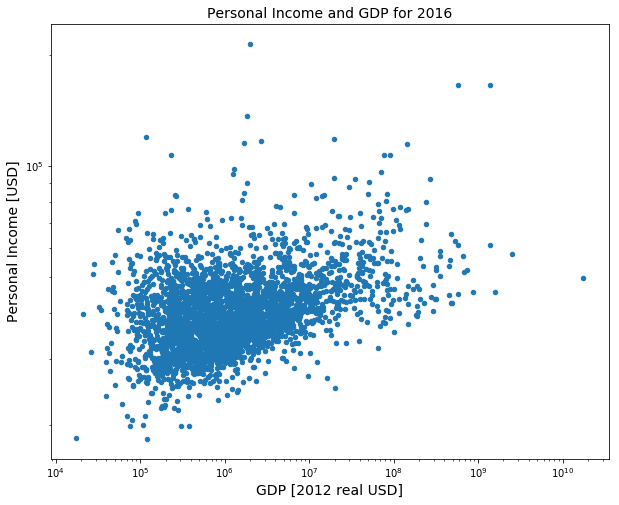

Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvalues:
[1.40385056 0.59677857]


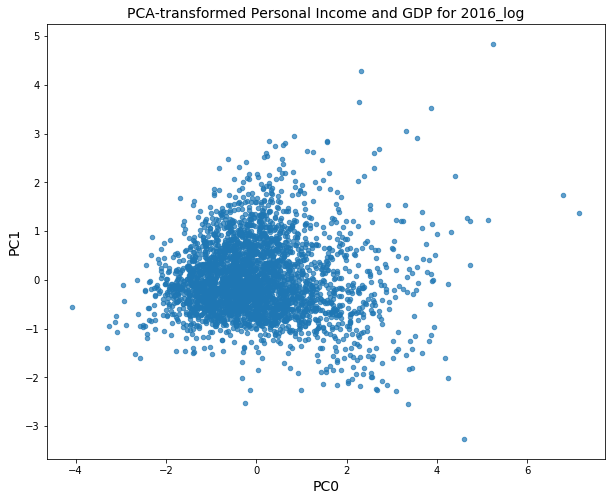

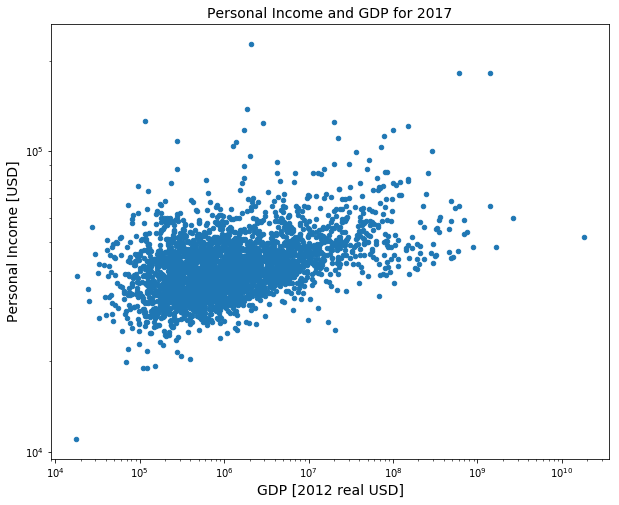

Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvalues:
[1.43964385 0.56098528]


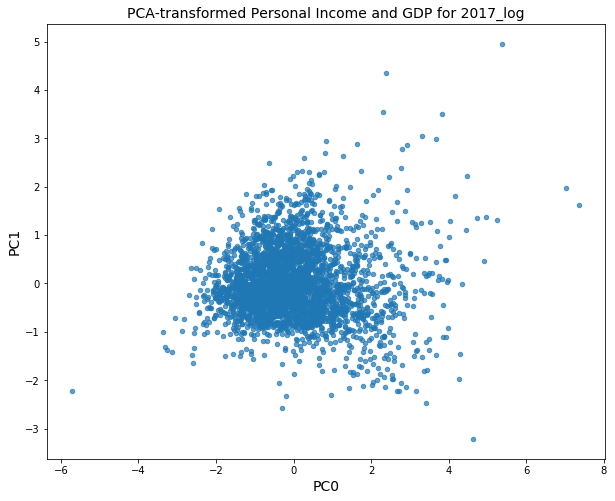

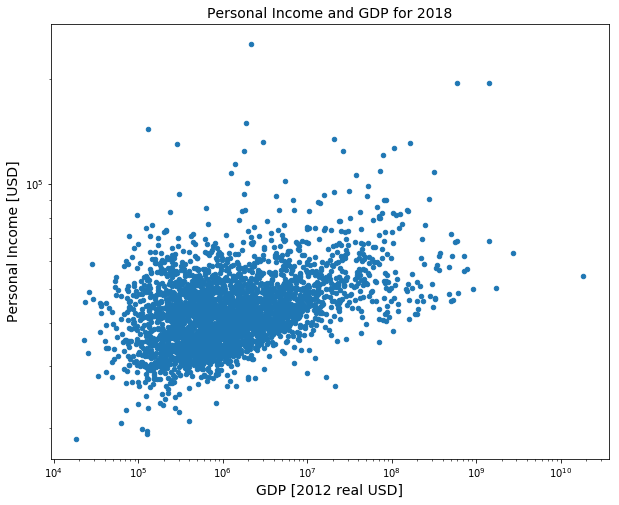

Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvalues:
[1.42837729 0.57225184]


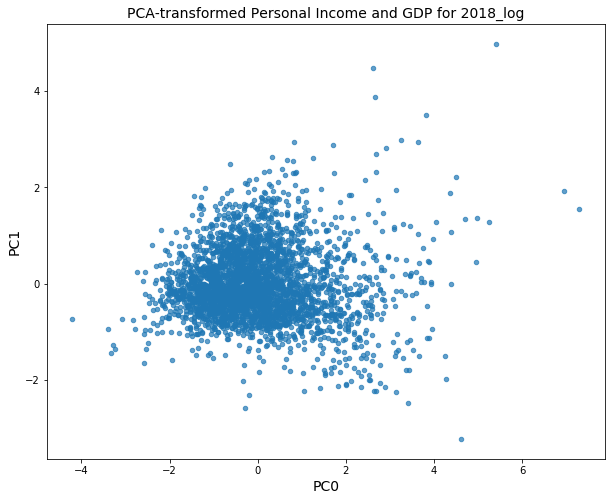

,aggregation_level,real_gdp_2012usd_2015,real_gdp_2012usd_2016,real_gdp_2012usd_2017,real_gdp_2012usd_2018,state,real_gdp_2012usd_2015_log,real_gdp_2012usd_2016_log,real_gdp_2012usd_2017_log,real_gdp_2012usd_2018_log,...,income_usd_2018,income_usd_2016_log,income_usd_2017_log,income_usd_2018_log,pc_0_2016_log,pc_1_2016_log,pc_0_2017_log,pc_1_2017_log,pc_0_2018_log,pc_1_2018_log
0,United States,1.740384e+10,1.768889e+10,1.810808e+10,1.863816e+10,United States,10.240645,10.247701,10.257872,10.270403,...,54446.0,4.697839,4.715042,4.735966,4.605182,-3.262875,4.622673,-3.209751,4.608800,-3.217042
1,Alabama,1.893391e+08,1.907030e+08,1.930239e+08,1.984359e+08,Alabama,8.277240,8.280358,8.285611,8.297620,...,42238.0,4.593552,4.607101,4.625703,2.021895,-2.120548,2.018227,-2.100921,2.008750,-2.109302
2,Autauga,1.518409e+06,1.526310e+06,1.422078e+06,1.483414e+06,Alabama,6.181389,6.183643,6.152923,6.171262,...,41618.0,4.597267,4.606919,4.619281,0.062258,-0.109576,0.009303,-0.094526,-0.032923,-0.154546
3,Baldwin,5.345363e+06,5.496105e+06,5.525882e+06,5.774289e+06,Alabama,6.727977,6.740055,6.742402,6.761499,...,45596.0,4.632528,4.643344,4.658927,0.832709,-0.392820,0.816577,-0.397092,0.790027,-0.440928
4,Barbour,7.565900e+05,7.428100e+05,7.456250e+05,7.874250e+05,Alabama,5.878861,5.870878,5.872520,5.896209,...,35199.0,4.499618,4.519145,4.546530,-0.908505,-0.488047,-0.862751,-0.438650,-0.783711,-0.388380


In [12]:
for year in ("2016", "2017", "2018"):

    ax = gdpiData.plot.scatter (x="real_gdp_2012usd_" + year, y="income_usd_" + year, figsize=(10, 8))
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("GDP [2012 real USD]", fontsize=14)
    ax.set_ylabel("Personal Income [USD]", fontsize=14)
    
    ax.set_title("Personal Income and GDP for " + year, fontsize=14)
    plt.show()
    
    gdpiData = applyPCA(gdpiData, year, True)

gdpiData.head()    